In [8]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn import linear_model

In [4]:
df_purchase = pd.read_csv("purchase data.csv")

scaler = pickle.load(open('scaler.pickle','rb'))
pca = pickle.load(open('pca.pickle','rb'))
kmeans_pca = pickle.load(open('kmeans_pca.pickle','rb'))

features = df_purchase[['Sex', 'Marital status', 'Age', 'Education', 'Income','Occupation', 'Settlement size']]
df_puchase_std_seg = scaler.transform(features)
df_purchase_seg_pca = pca.transform(df_puchase_std_seg)
purchase_seg_kmeans_pca = kmeans_pca.predict(df_purchase_seg_pca)

df_purchase_predictors = df_purchase.copy()
df_purchase_predictors['Segment'] = purchase_seg_kmeans_pca
segment_dummies = pd.get_dummies(df_purchase_predictors['Segment'],prefix='Segment',prefix_sep='_')
df_purchase_predictors = pd.concat([df_purchase_predictors,segment_dummies],axis=1)

df_pa = df_purchase_predictors

In [5]:
df_pa.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Age,Education,Income,Occupation,Settlement size,Segment,Segment_0,Segment_1,Segment_2,Segment_3
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,47,1,110866,1,0,0,1,0,0,0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,47,1,110866,1,0,0,1,0,0,0
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,47,1,110866,1,0,0,1,0,0,0
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,47,1,110866,1,0,0,1,0,0,0
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,47,1,110866,1,0,0,1,0,0,0


## PURCHASE PROBABILITY 

In [9]:
Y = df_pa['Incidence']
X = pd.DataFrame((df_pa['Price_1'] + df_pa['Price_2'] + df_pa['Price_3'] + df_pa['Price_4'] + df_pa['Price_5']) / 5,
                 columns=['mean_price'])
                 
model_purchase = linear_model.LogisticRegression()
model_purchase.fit(X,Y)

LogisticRegression()

In [10]:
model_purchase.coef_

array([[-2.3480548]])

In [11]:
df_pa[['Price_1','Price_2','Price_3','Price_4','Price_5']].describe()

,Price_1,Price_2,Price_3,Price_4,Price_5
count,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000
mean,1.392074,1.780999,2.006789,2.159945,2.654798
std,0.091139,0.170868,0.046867,0.089825,0.098272
min,1.100000,1.260000,1.870000,1.760000,2.110000
25%,1.340000,1.580000,1.970000,2.120000,2.630000
50%,1.390000,1.880000,2.010000,2.170000,2.670000
75%,1.470000,1.890000,2.060000,2.240000,2.700000
max,1.590000,1.900000,2.140000,2.260000,2.800000


In [26]:
price_range = np.arange(0.5,3.5,0.01)

In [27]:
price_range = pd.DataFrame(price_range,columns=['price'])

In [28]:
price_range

,price
0,0.50
1,0.51
2,0.52
3,0.53
4,0.54
...,...
295,3.45
296,3.46
297,3.47
298,3.48


In [16]:
Y_pr = model_purchase.predict_proba(price_range)

In [18]:
Y_pr = Y_pr[:,1]

In [19]:
Y_pr

array([0.91789303, 0.91610596, 0.91428362, 0.91242548, 0.910531  ,
       0.90859965, 0.90663088, 0.90462415, 0.90257893, 0.90049467,
       0.89837085, 0.89620692, 0.89400234, 0.8917566 , 0.88946917,
       0.88713951, 0.88476711, 0.88235145, 0.87989203, 0.87738834,
       0.87483988, 0.87224617, 0.86960672, 0.86692105, 0.86418871,
       0.86140924, 0.85858219, 0.85570714, 0.85278366, 0.84981134,
       0.84678979, 0.84371863, 0.84059749, 0.83742604, 0.83420393,
       0.83093086, 0.82760652, 0.82423064, 0.82080297, 0.81732327,
       0.81379133, 0.81020696, 0.80657   , 0.80288029, 0.79913773,
       0.79534223, 0.79149372, 0.78759217, 0.78363757, 0.77962994,
       0.77556934, 0.77145585, 0.76728959, 0.76307071, 0.75879938,
       0.75447583, 0.7501003 , 0.74567308, 0.74119449, 0.73666488,
       0.73208466, 0.72745424, 0.7227741 , 0.71804474, 0.71326671,
       0.70844058, 0.70356699, 0.69864658, 0.69368006, 0.68866816,
       0.68361166, 0.67851138, 0.67336816, 0.66818289, 0.66295

In [32]:
pe = model_purchase.coef_[:,0] * (1-Y_pr) * price_range['price']

In [34]:
price_range['pe'] = pe

In [36]:
pd.options.display.max_rows = None

In [37]:
price_range

,price,pe
0,0.50,-0.096396
1,0.51,-0.100464
2,0.52,-0.104659
3,0.53,-0.108984
4,0.54,-0.113442
5,0.55,-0.118037
6,0.56,-0.122772
7,0.57,-0.127650
8,0.58,-0.132675
9,0.59,-0.137850


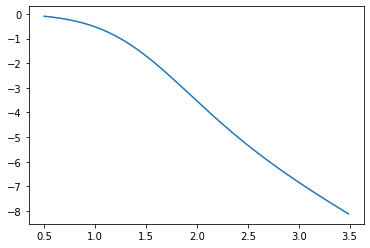

In [38]:
plt.plot(price_range['price'],price_range['pe'])

In [39]:
df_pa_seg1 = df_pa[df_pa['Segment_1']==1]
Y = df_pa_seg1['Incidence']
X = pd.DataFrame()
X['mean_price'] = (df_pa_seg1['Price_1'] + 
                   df_pa_seg1['Price_2'] +
                   df_pa_seg1['Price_3'] +
                   df_pa_seg1['Price_4'] +
                   df_pa_seg1['Price_5'])/5

model_purchase_seg1 = linear_model.LogisticRegression()
model_purchase_seg1.fit(X,Y)

LogisticRegression()

In [40]:
model_purchase_seg1.coef_

array([[-1.52462348]])

In [41]:
price_range = np.arange(0.5,3.5,0.01)
price_range_df = pd.DataFrame(price_range,columns=['price'])

In [46]:
Y_pr_seg1 = model_purchase_seg1.predict_proba(price_range.reshape(-1,1))

In [48]:
Y_pr_seg1 = Y_pr_seg1[:,1] 

In [49]:
pe = model_purchase_seg1.coef_[:,0] * price_range * (1-Y_pr_seg1)

In [51]:
price_range_df['pe'] = pe

In [52]:
price_range_df

,price,pe
0,0.50,-0.210017
1,0.51,-0.216591
2,0.52,-0.223275
3,0.53,-0.230070
4,0.54,-0.236975
5,0.55,-0.243993
6,0.56,-0.251123
7,0.57,-0.258367
8,0.58,-0.265725
9,0.59,-0.273198


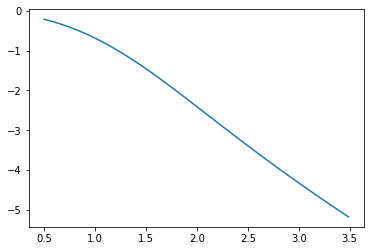

In [53]:
plt.plot(price_range_df['price'],price_range_df['pe'])

The price elasticity curve tells us if customers are elastic or not and by how much. If curve is steep, they are more sensitive to price. The price elasticity cureve will be less steeper for well off segment and more steeper for fewer opportunitie segment.

In [55]:
Y = df_pa['Incidence']
X = pd.DataFrame()
X['mean_price'] = (df_pa['Price_1'] +
                  df_pa['Price_3'] +
                  df_pa['Price_3'] +
                  df_pa['Price_4'] +
                  df_pa['Price_5'])/5
X['mean_promotion'] = (df_pa['Promotion_1'] +
                  df_pa['Promotion_2'] +
                  df_pa['Promotion_3'] +
                  df_pa['Promotion_4'] +
                  df_pa['Promotion_5'])/5

model_promo = linear_model.LogisticRegression()
model_promo.fit(X,Y)

LogisticRegression()

In [56]:
model_promo.coef_

array([[-0.153284  ,  0.77252646]])

In [57]:
price_range = np.arange(0.5,3.5,0.01)
price_range_df = pd.DataFrame(price_range,columns=['price'])
price_range_df['promotion'] = 1

In [58]:
price_range_df

,price,promotion
0,0.50,1
1,0.51,1
2,0.52,1
3,0.53,1
4,0.54,1
5,0.55,1
6,0.56,1
7,0.57,1
8,0.58,1
9,0.59,1


In [59]:
y_pr_promo = model_promo.predict_proba(price_range_df)

In [61]:
y_pr_promo = y_pr_promo[:,1] 

In [62]:
pe = model_promo.coef_[:,0]*price_range_df['price']*(1-y_pr_promo)

In [63]:
pe

0     -0.042692
1     -0.043575
2     -0.044460
3     -0.045345
4     -0.046232
5     -0.047120
6     -0.048010
7     -0.048900
8     -0.049791
9     -0.050684
10    -0.051578
11    -0.052473
12    -0.053369
13    -0.054266
14    -0.055164
15    -0.056064
16    -0.056965
17    -0.057866
18    -0.058769
19    -0.059673
20    -0.060579
21    -0.061485
22    -0.062393
23    -0.063301
24    -0.064211
25    -0.065122
26    -0.066034
27    -0.066948
28    -0.067862
29    -0.068778
30    -0.069694
31    -0.070612
32    -0.071531
33    -0.072451
34    -0.073373
35    -0.074295
36    -0.075219
37    -0.076143
38    -0.077069
39    -0.077996
40    -0.078924
41    -0.079854
42    -0.080784
43    -0.081716
44    -0.082648
45    -0.083582
46    -0.084517
47    -0.085453
48    -0.086391
49    -0.087329
50    -0.088268
51    -0.089209
52    -0.090151
53    -0.091094
54    -0.092038
55    -0.092983
56    -0.093929
57    -0.094877
58    -0.095825
59    -0.096775
60    -0.097726
61    -0.098678
62    -0

By adding promotions customers have become inelastic